Task 3: Car Price Prediction

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
#loading the dataset
df =pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
#Displays first 5rows
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
#Displays the last 5 rows
df.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [8]:
#to check the number of rows and columns
df.shape

(301, 9)

In [9]:
#To check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#to check the summary
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
#check for missing values
df.isnull().sum()


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [15]:
#check for duplicate values
print('Duplicate values:')
df.duplicated().sum()

Duplicate values:


2

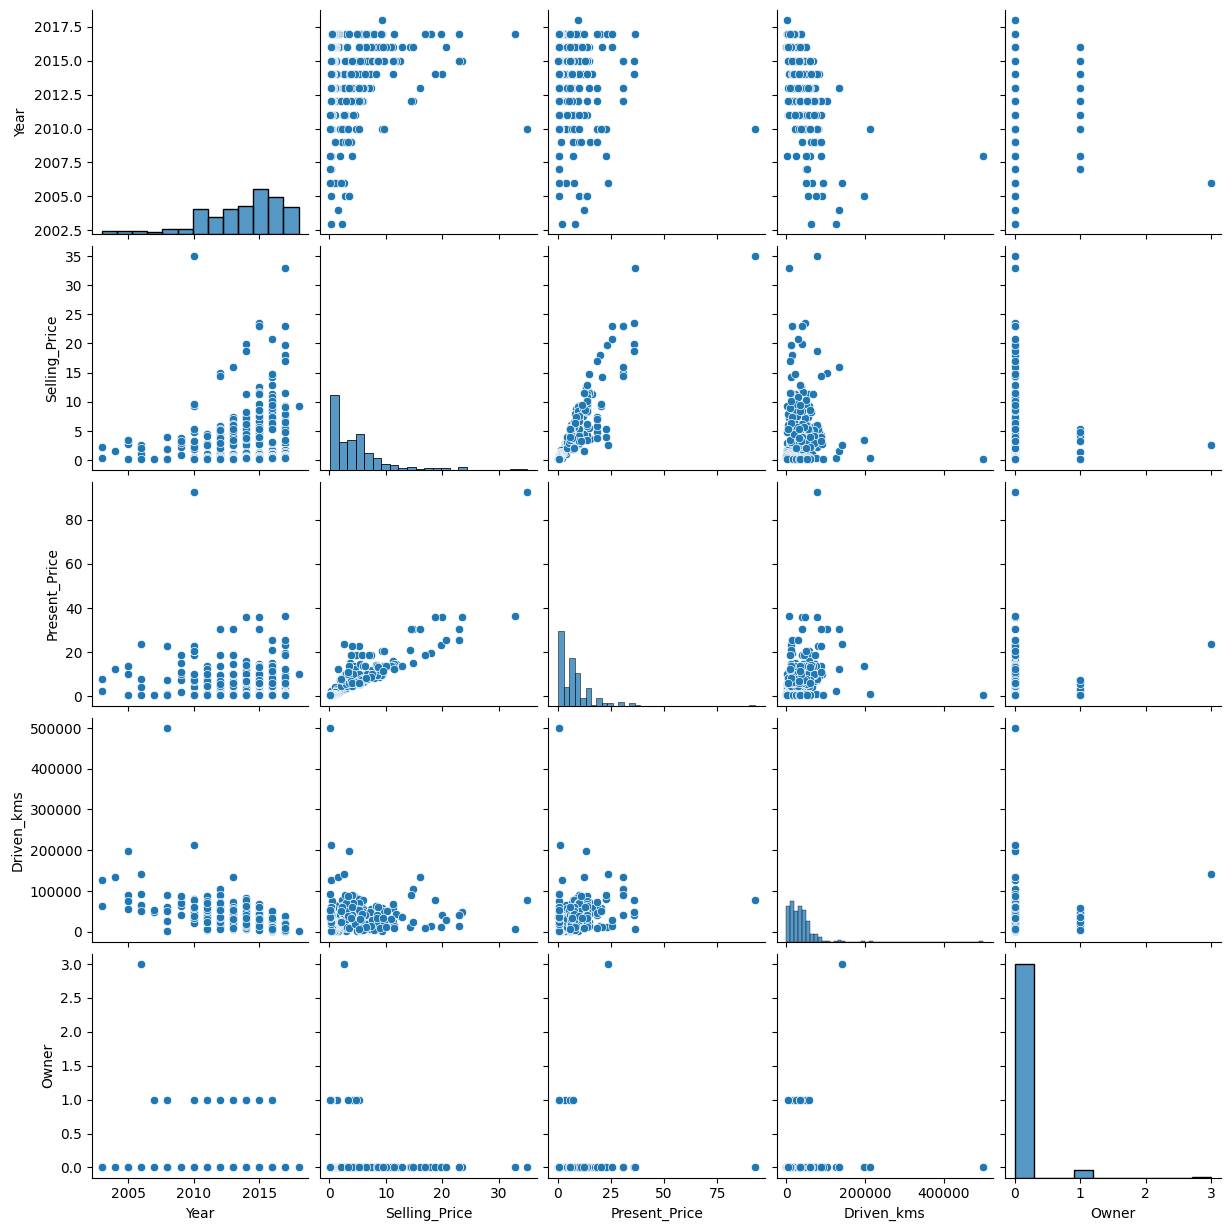

In [16]:
sns.pairplot(df)
plt.show()

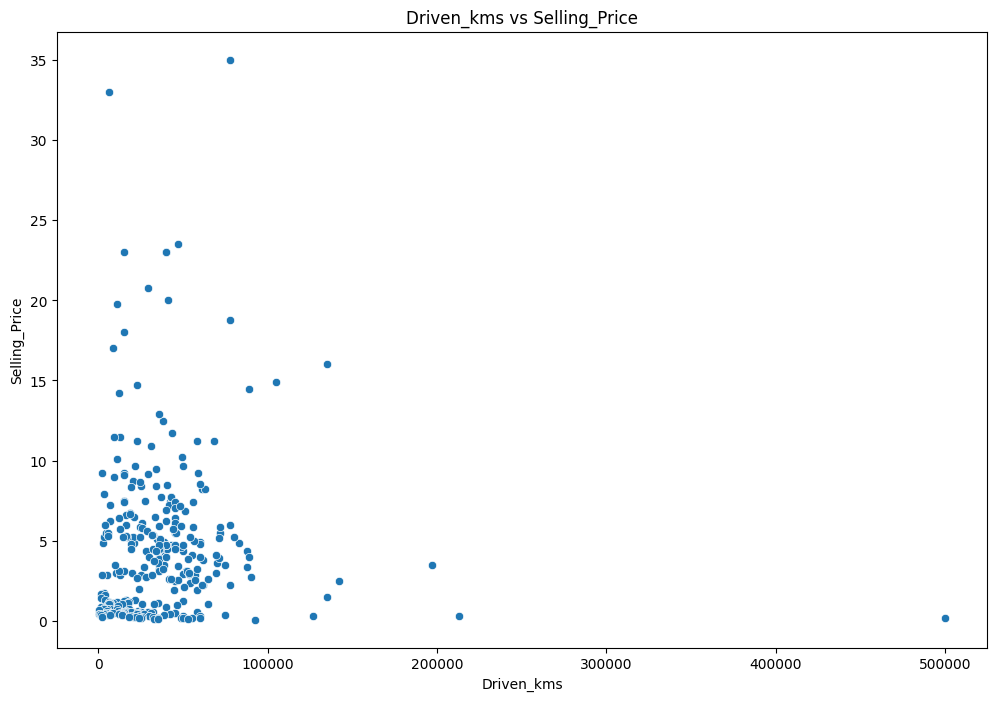

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.title('Driven_kms vs Selling_Price')
plt.xlabel('Driven_kms')
plt.ylabel('Selling_Price')
plt.show()

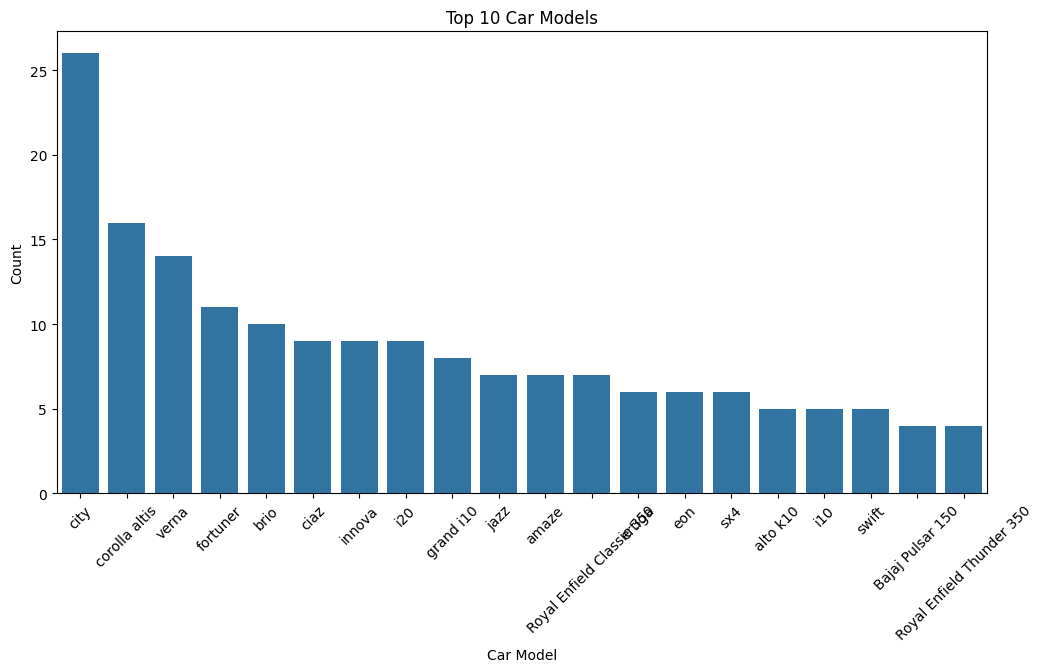

In [21]:
#Number of top car models to plot
top_car_models=df['Car_Name'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_car_models.index, y=top_car_models.values)
plt.title('Top 10 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

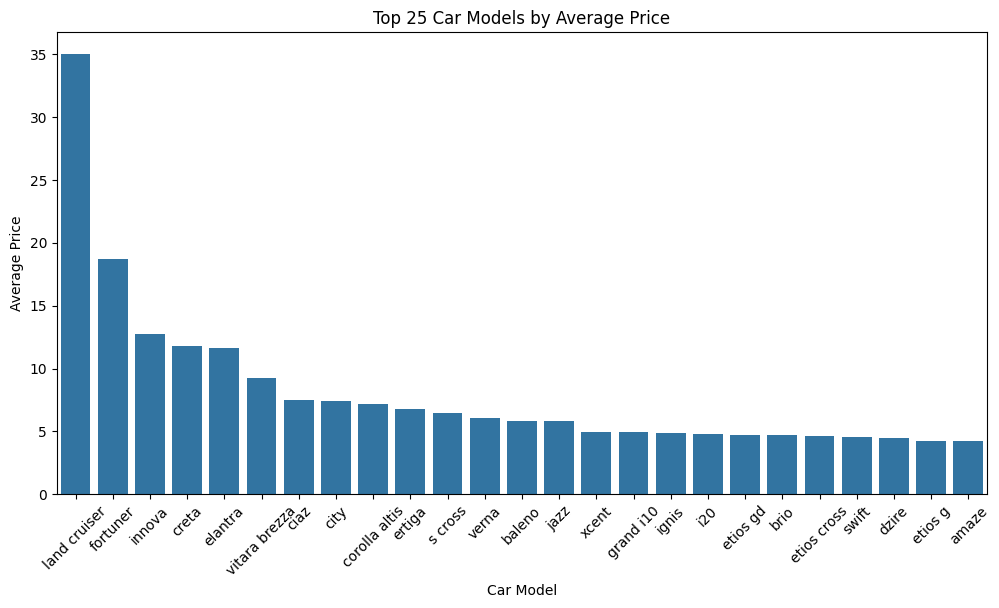

In [22]:
#Top 25 car models by Average Price
top_car_models=df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False).head(25)
plt.figure(figsize=(12,6))
sns.barplot(x=top_car_models.index, y=top_car_models.values)
plt.title('Top 25 Car Models by Average Price')
plt.xlabel('Car Model')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

Data Cleaning

In [26]:
print(df.columns)
print(df['Selling_type'].value_counts())

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


In [30]:
#Feature Encoding
df['Fuel_Type']=df['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})
df['Selling_type']=df['Selling_type'].map({'Dealer':0, 'Individual':1})


In [31]:
#encoding Fuel_type column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

<ipython-input-31-7b899a6dae95>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [32]:
#Target variable
X=df.drop(['Car_Name','Selling_Price'],axis=1)
Y=df['Selling_Price']

In [33]:
X


,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [34]:
Y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [35]:
#split the data in training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [36]:
#train the linear regression model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [37]:
LinearRegression()

LinearRegression()

In [38]:
#Evaluate the model
y_pred=model.predict(X_test)
mse=mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print('Mean Squared Error:',mse)
print('R-squared:',r2)

Mean Squared Error: 2.9360377470287764
R-squared: 0.8401415675614679


In [39]:
#Using the Random Forest Algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
mse=mean_squared_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print('Mean Squared Error:',mse)
print('R-squared:',r2)

Mean Squared Error: 0.7523777942622951
R-squared: 0.9590352900217151
